In [321]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data

How likely is it that you roll doubles when rolling two dice?

In [15]:
rolls = np.random.choice([1,2,3,4,5,6], size = (10000,2))

In [16]:
rolls = pd.DataFrame(rolls)

In [17]:
rolls

,0,1
0,5,3
1,4,1
2,2,2
3,1,4
4,3,4
...,...,...
9995,3,6
9996,4,5
9997,4,2
9998,5,2


In [23]:
rolls['match'] = rolls.apply(lambda x: True if x[0] == x[1] else False, axis =1)

In [25]:
rolls.match.mean()

0.1672

If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [97]:
flips = np.random.choice([1, 0], size = (10000,8))

In [98]:
flips = pd.DataFrame(flips)

In [99]:
flips.head()

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,1,1,1,0,0,1,0,1
2,0,1,1,0,0,1,0,1
3,0,1,1,0,0,0,1,1
4,0,0,1,0,0,1,0,1


In [103]:
flips['match']= flips.apply(lambda row: True if row.sum() == 3 else False, axis =1)

In [105]:
flips.match.mean()

0.2251

What is the probability of getting more than 3 heads?

In [106]:
flips['match1'] = flips.apply(lambda x: True if x.sum() > 3 else False, axis =1)

In [107]:
flips.match1.mean()

0.8522

There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [109]:
bb = np.random.choice([1,0], size = (10000,2), p=[1/4, 3/4])

In [110]:
df = pd.DataFrame(bb)

In [111]:
df.head()

,0,1
0,0,1
1,0,0
2,0,0
3,0,1
4,1,0


In [113]:
df['ds'] = df.apply(lambda x: True if x.sum()==2 else False, axis =1)

In [115]:
df.ds.mean()

0.0608

Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [117]:
pp = np.random.normal(3,1.5, size = (10000, 5))

In [118]:
pp = pd.DataFrame(pp)

In [121]:
pp['s'] = pp.apply(lambda x: True if x.sum() <=16 else False, axis =1)

In [123]:
pp.s.mean()

0.6186

Compare Heights

Men have an average height of 178 cm and standard deviation of 8cm.
Women have a mean of 170, sd = 6cm.
If a man and woman are chosen at random, P(woman taller than man)?

In [125]:
h_men = np.random.normal(178, 8, size =10000)
h_women = np.random.normal(170,6, size =10000)

In [127]:
(h_women > h_men).mean()

0.2175

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

What is the probability that we observe an installation issue within the first 150 students that download anaconda?

How likely is it that 450 students all download anaconda without an issue?
0 = no issue
1= failure

In [148]:
install = np.random.choice([0,1], size = (10000,450), p =[249/250, 1/250])

In [149]:
install = pd.DataFrame(install)

In [150]:
(install.sum(axis=1)==0).mean()

0.1691

In [147]:
(install.sum(axis=1)>0).mean()

0.4591

There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?
1 = food trucks
0 = no food truck

In [151]:
truck = np.random.choice([1,0], size = (10000,3), p =[0.7, 0.3])

In [153]:
truck = pd.DataFrame(truck)

In [157]:
(truck.sum(axis=1)==0).mean()

0.0266

How likely is it that a food truck will show up sometime this week?

In [166]:
truck = np.random.choice([1,0], size = (100000,7), p =[0.7, 0.3])

In [167]:
truck = pd.DataFrame(truck)
truck.head()

,0,1,2,3,4,5,6
0,1,0,0,1,0,0,1
1,0,1,1,1,1,0,1
2,0,1,1,1,0,0,1
3,1,0,0,1,1,1,0
4,1,0,1,1,1,1,1


In [168]:
(truck.sum(axis=1) > 0).mean()

0.99977

If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [194]:
bday = np.random.choice(range(1,366), size = (10000, 23))

In [195]:
bday = pd.DataFrame(bday)
bday

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,7,132,160,202,149,260,210,344,75,224,...,286,241,239,145,236,102,319,138,119,1
1,312,33,157,158,214,6,185,36,315,231,...,11,335,187,24,50,22,47,78,162,280
2,328,16,27,174,297,264,241,94,15,247,...,308,95,267,301,262,125,118,79,293,94
3,126,27,268,357,353,5,330,259,115,43,...,311,176,22,185,297,207,235,266,52,327
4,341,112,271,270,269,273,315,352,284,154,...,227,328,74,57,284,82,337,145,164,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99,240,195,365,107,285,281,51,9,172,...,208,284,211,292,5,291,274,163,185,158
9996,148,312,54,197,87,91,185,330,309,38,...,38,314,335,349,219,327,254,291,288,140
9997,34,343,359,82,196,115,243,344,93,182,...,217,41,16,212,337,188,181,263,118,360
9998,155,67,48,141,256,59,169,208,211,97,...,164,65,49,35,27,50,334,287,90,256


In [196]:
bday['match2'] =  bday.nunique(axis=1)

In [198]:
(bday.match2==22).mean()

0.3633

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [206]:
x= range(0,12)
y = stats.poisson(2).pmf(x)

<BarContainer object of 12 artists>

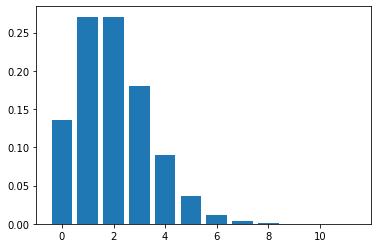

In [214]:
plt.bar(x,y)

In [216]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [221]:
1-stats.poisson(2).cdf(2)

0.3233235838169366

In [222]:
stats.poisson(2).sf(0)

0.8646647167633873

In [223]:
cars = stats.poisson(2)

In [225]:
(cars.rvs(10000)==0).mean()

0.132

In [226]:
cars= stats.poisson(2)

In [228]:
(cars.rvs(10000)>=3).mean()

0.323

In [229]:
(cars.rvs(10000)>0).mean()

0.8618

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [233]:
grades = stats.norm(3.0, 0.3)

In [235]:
grades.isf(0.05)

3.4934560880854417

In [237]:
grades.ppf(0.15)

2.689069983151863

In [238]:
grades.ppf(0.2), grades.ppf(0.3)

(2.7475136299281258, 2.842679846187588)

In [241]:
grades.cdf(3.5)

0.9522096477271853

In [254]:
grades1 = stats.norm(3.0, 0.3).rvs(10000)

In [256]:
np.percentile(grades1, 95)

3.489203663177898

In [257]:
np.percentile(grades1, 20), np.percentile(grades1, 30)

(2.751717327487588, 2.8490266181390607)

In [259]:
(grades1<3.5).mean()

0.9537

In [262]:
stats.binom(4326,0.02).sf(96)

0.1397582363130086

In [263]:
clicks = stats.binom(4326,0.02).rvs(10000)

In [265]:
(clicks>96).mean()

0.1433

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [268]:
p = 0.01
n = 60
score = stats.binom(n,p).pmf(0)

In [270]:
1-score

0.45284335760923855

In [277]:
score = stats.binom(n,p).rvs(10000)

In [278]:
(score>0).mean()

0.4539

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [290]:
p = 0.03
n = 66*0.9
clean = stats.binom(n,p)

In [291]:
clean.sf(0)

0.8342199288437355

In [294]:
clean.pmf(0)**5

0.00011781621791055168

In [296]:
clean = stats.binom(59,p).rvs(10000)

In [298]:
(clean>0).mean()

0.8366

In [302]:
(clean==0).mean()**2

0.026699559999999997

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [303]:
33/2

16.5

In [306]:
stats.norm(15,3).cdf(16.5)

0.6914624612740131

In [311]:
pp = stats.norm(15,3).rvs(100000)

In [312]:
(pp<16.5).mean()

0.69319

 Bobo the amoeba has a 25%, 25%, and 50% chance of producing 0, 1, or 2 offspring, respectively. Each of Bobo’s descendants also have the same probabilities. What is the probability that Bobo’s lineage dies out?

In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the proba- bility that you see at least one shooting star in the period of an hour?

In [317]:
1-stats.binom(4,0.2).cdf(0)

0.5903999999999999

 A certain couple tells you that they have two children, at least one of which is a girl. What is the probability that they have two girls?

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [322]:
mpg = data('mpg')

In [323]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

In [324]:
mpg['avg'] = (mpg.cty+mpg.hwy)/2

In [327]:
x= mpg.avg[mpg.year == 1999]
y = mpg.avg[mpg.year == 2008]

In [328]:
stats.ttest_ind(x, y)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

In [333]:
x = mpg.avg[mpg['class']== 'compact']
avg = mpg.avg.mean()
t, p = stats.ttest_1samp(x, avg)
t,p

(7.896888573132535, 4.1985637943171336e-10)

In [335]:
x = mpg.avg[mpg.trans.str[0:4]=='auto']
y = mpg.avg[mpg.trans.str[0:4]=='manu']



In [336]:
stats.ttest_ind(x, y)

Ttest_indResult(statistic=-4.593437735750014, pvalue=7.154374401145683e-06)

In [337]:
tips = data('tips')

In [338]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [339]:
tips['t_p'] = tips.tip/tips.total_bill

In [340]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,t_p
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


tip % is same for male and female

In [341]:
x1 = tips.t_p[tips.sex == 'Male']
x2 = tips.t_p[tips.sex == 'Female']
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

relationship between sex and smoker

In [346]:
observed = pd.crosstab(tips.sex, tips.smoker)

In [347]:
observed

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [348]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [349]:
chi2, p, degf, expected

(0.008763290531773594, 0.925417020494423, 1, array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

In [350]:
stats.pearsonr(tips.total_bill, tips.tip)

(0.6757341092113645, 6.692470646863477e-34)